In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loans = pd.read_csv("loan_data.csv")

In [4]:
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [10]:
# a method to create fancier hue in hist
plt.figure()
sns.set_style("whitegrid")
loans[loans["not.fully.paid"]==0]["fico"].hist(color="red",alpha=0.5,label="not fully paid=0",bins=30)
loans[loans["not.fully.paid"]==1]["fico"].hist(color="blue",alpha=0.5,label="not fully paid=1",bins=30)
plt.legend()

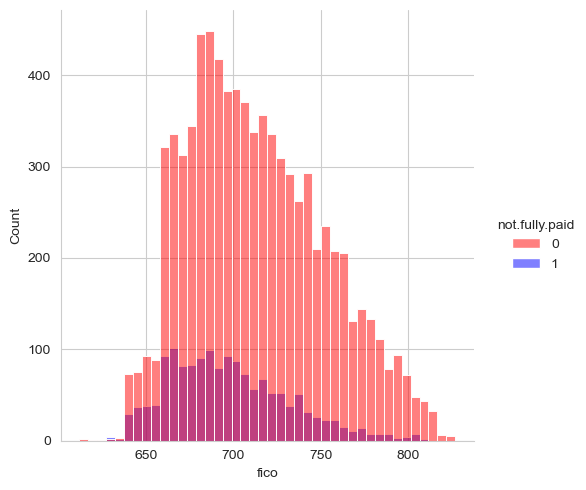

In [14]:
sns.displot(x="fico",data=loans,hue="not.fully.paid",palette=["red","blue"])

In [22]:
plt.figure()
sns.set_style("whitegrid")
loans[loans["credit.policy"]==0]["fico"].hist(color="red",alpha=0.5,label="not fully paid=0",bins=30)
loans[loans["credit.policy"]==1]["fico"].hist(color="blue",alpha=0.5,label="not fully paid=1",bins=30)
plt.legend()

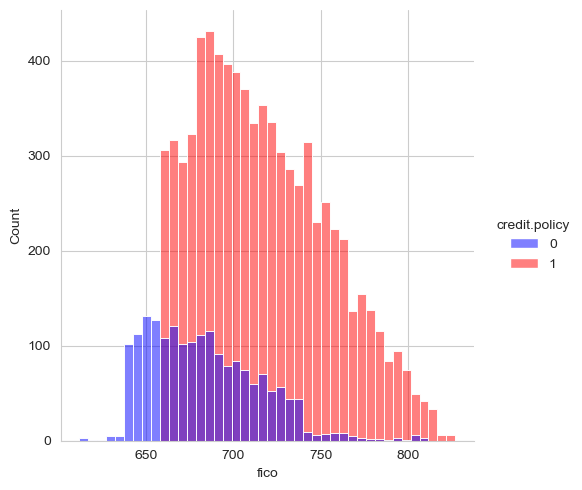

In [23]:
sns.displot(x="fico",data=loans,hue="credit.policy",palette=["blue","red"])

<Axes: xlabel='purpose', ylabel='count'>

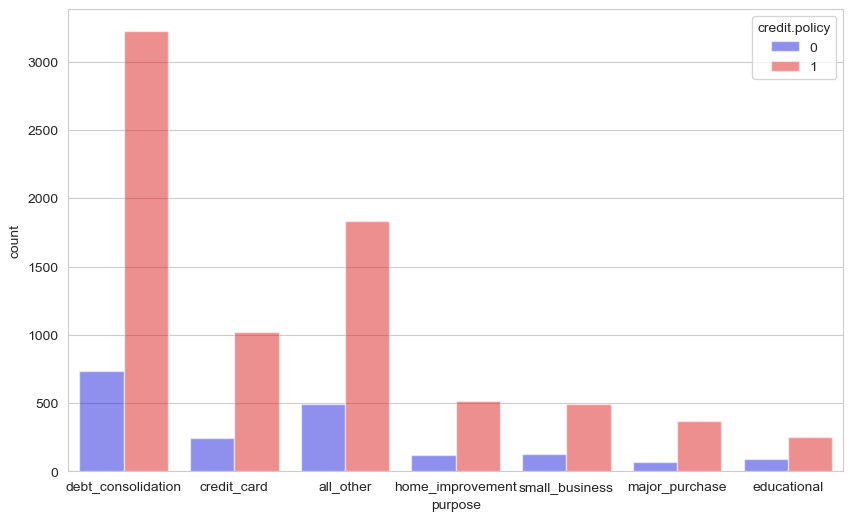

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x="purpose",data=loans,hue="credit.policy",palette=["blue","red"],alpha=0.5)

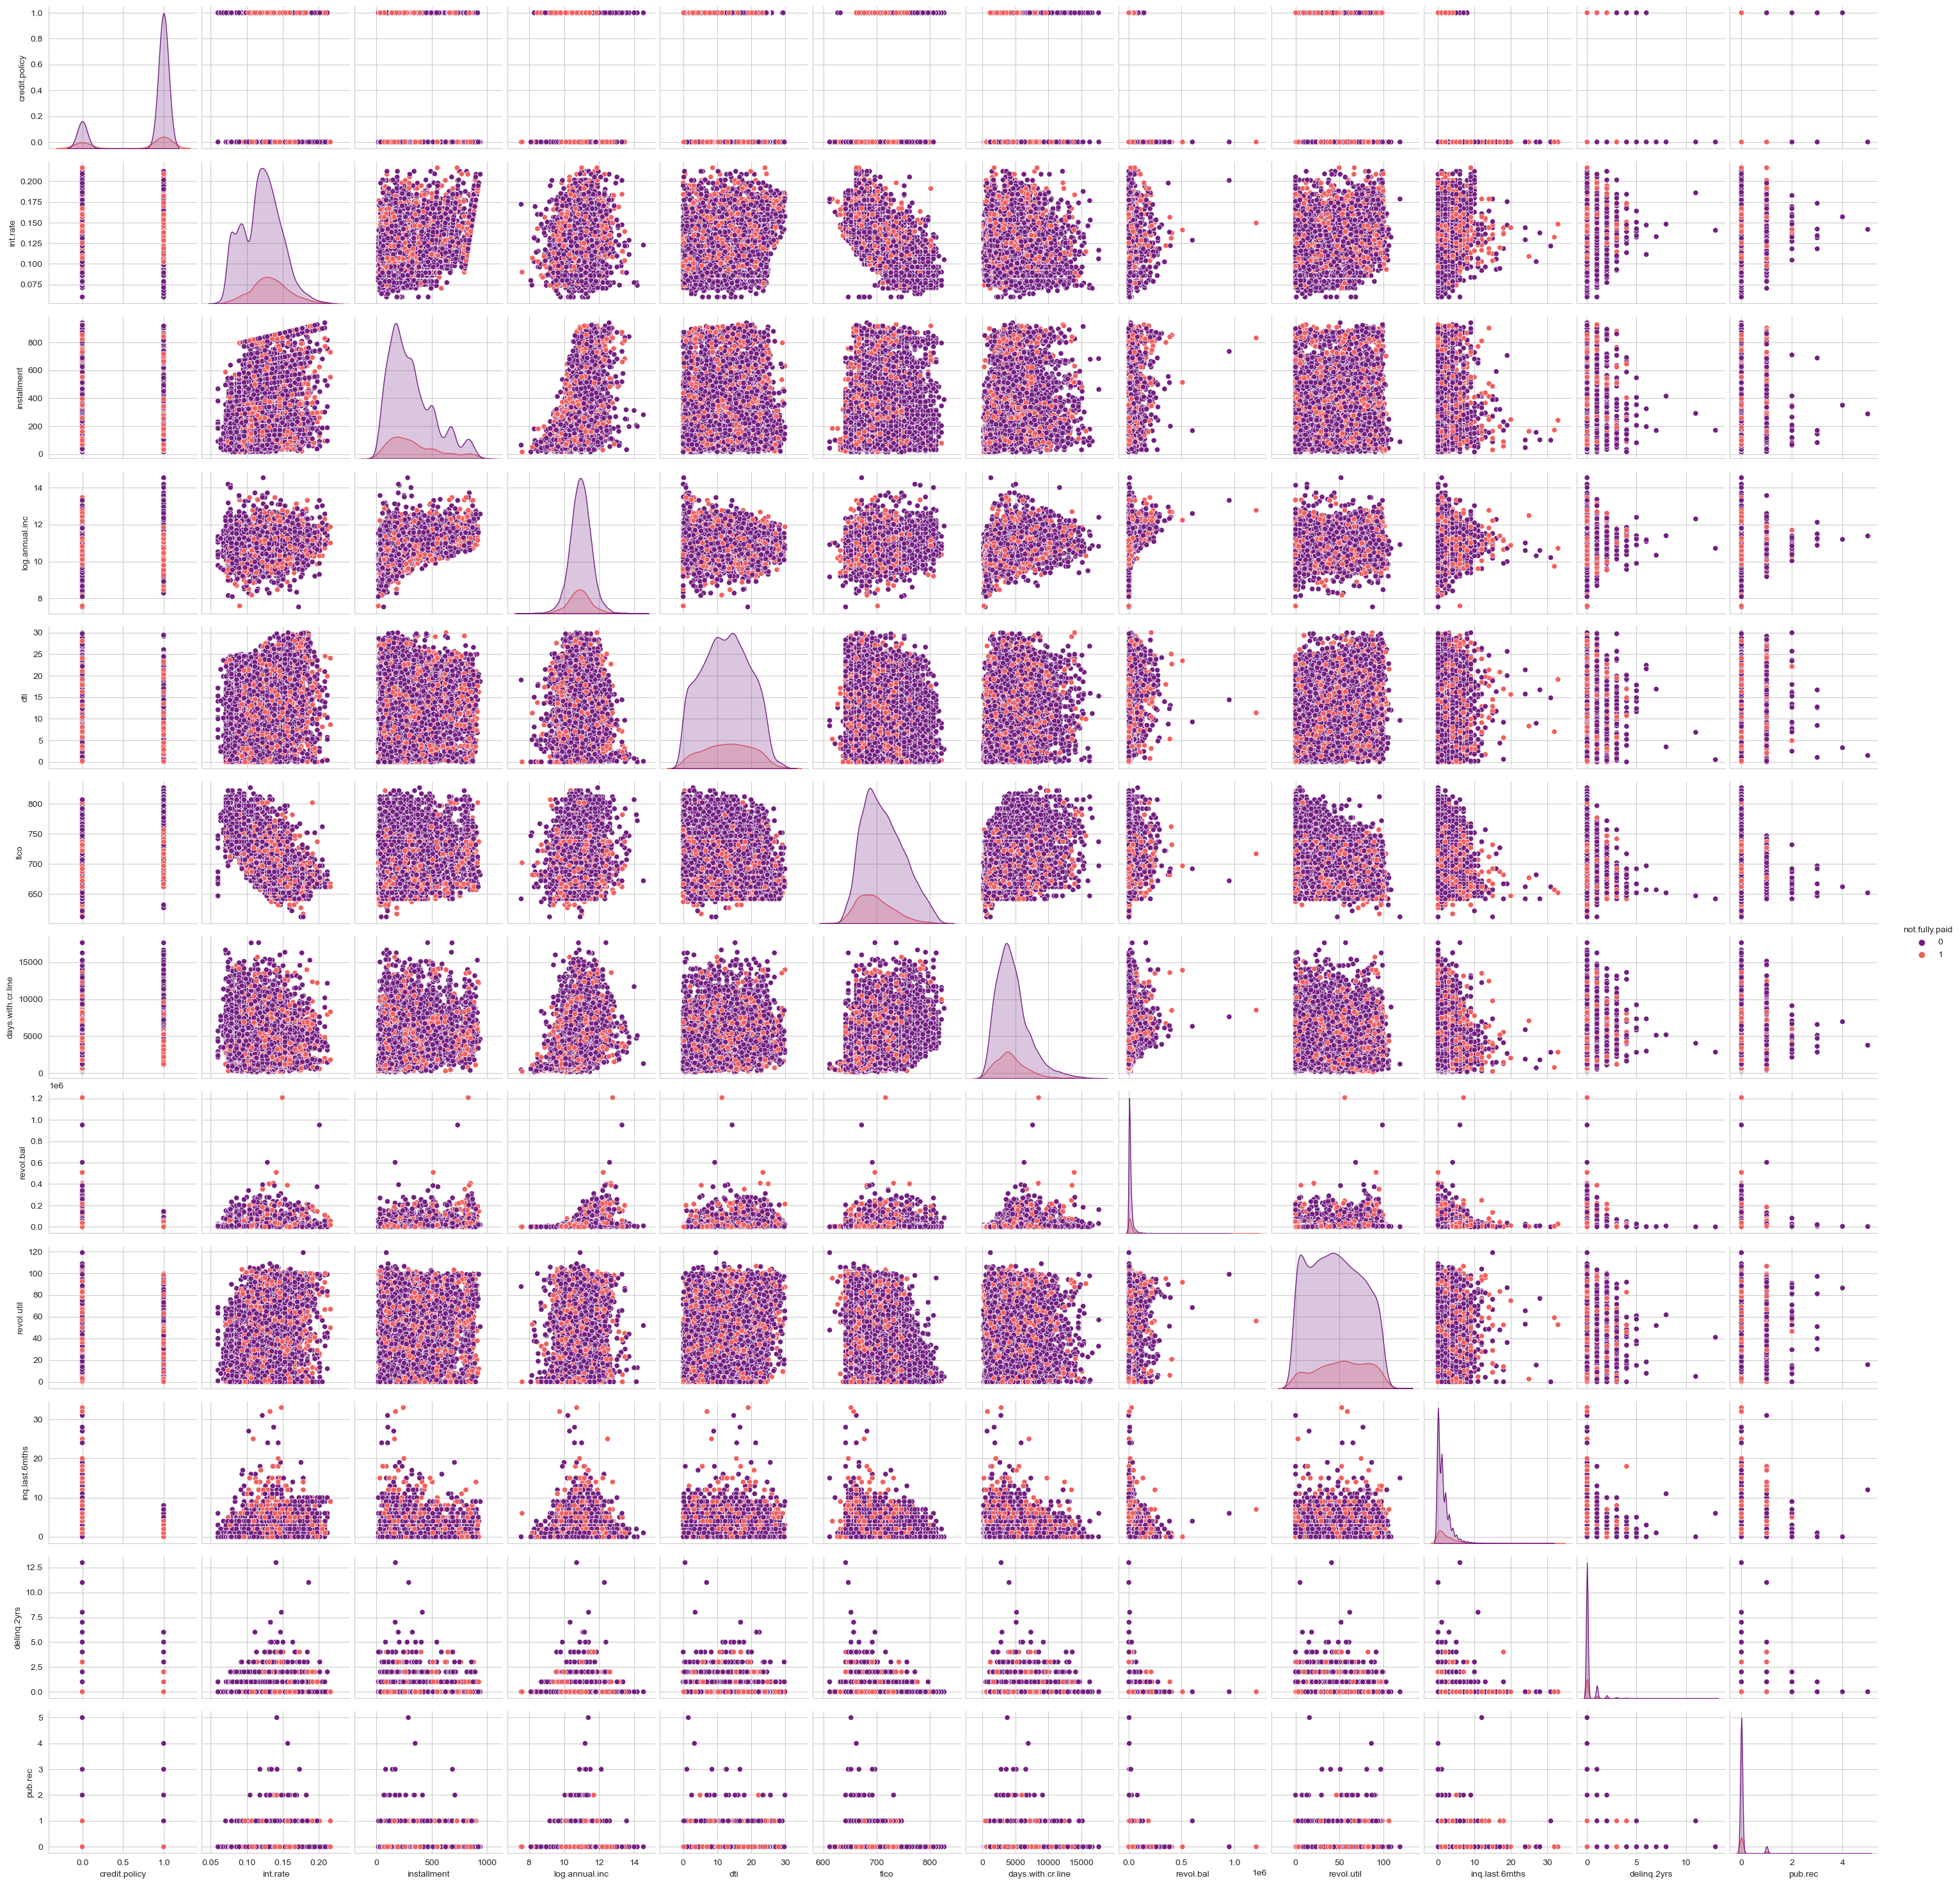

In [30]:
sns.pairplot(loans,hue="not.fully.paid",palette="magma")

In [31]:
cat_ft = ["purpose"]
final_data = pd.get_dummies(loans,columns=["purpose"],drop_first=True)

In [34]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [36]:
X = final_data.drop("not.fully.paid",axis=1)
y = final_data["not.fully.paid"]

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [41]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
predictions = dtree.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2430
           1       0.19      0.22      0.21       444

    accuracy                           0.74      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.74      0.74      2874



In [45]:
print(confusion_matrix(y_test,predictions))

[[2022  408]
 [ 346   98]]


In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=700)

In [47]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=700)

In [48]:
pred = rfc.predict(X_test)

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2430
           1       0.29      0.01      0.02       444

    accuracy                           0.84      2874
   macro avg       0.57      0.50      0.47      2874
weighted avg       0.76      0.84      0.78      2874



In [50]:
print(confusion_matrix(y_test,pred))

[[2418   12]
 [ 439    5]]
